In [1]:
import tensorflow as tf
import core_modules
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


270 556
1.15.2


In [2]:
new_model = tf.keras.models.load_model('/home/ec2-user/SageMaker/ECG_Model/out/cnn_11_epochs.h5')

new_model.summary()

n, (x_train, y_train), (x_test, y_test) = core_modules.load_data(0.8)
x_test2  =  x_test.reshape((1703,270,556,1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 270, 556, 6)       1740      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 185, 6)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 179, 16)       4720      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 16)        0         
_________________________________________________________________
con

In [3]:
x_test2  =  x_test.reshape((1703,270,556,1))
loss, acc = new_model.evaluate(x_test2,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

1703/1703 - 5s - loss: 289.5696 - sparse_categorical_accuracy: 0.6718
Restored model, accuracy: 67.18%


In [4]:
Stat = [0 for x in range(0,3)]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


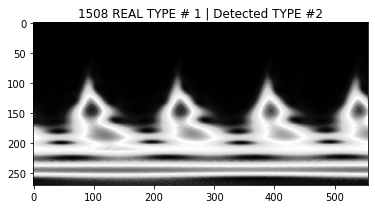

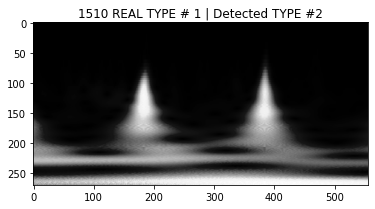

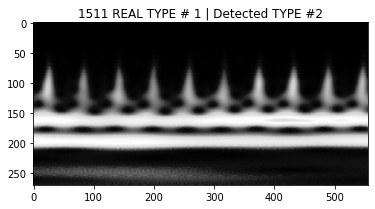

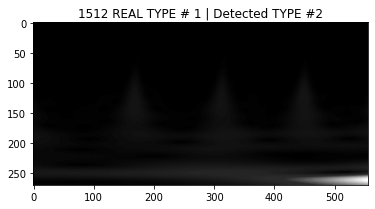

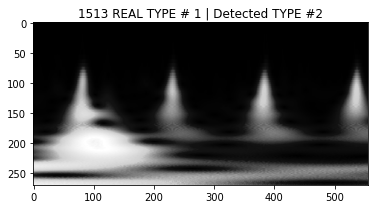

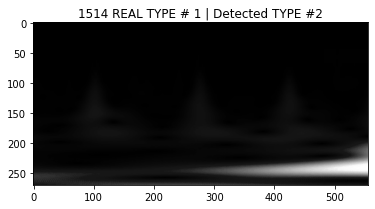

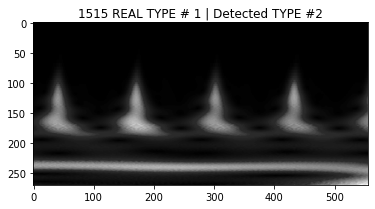

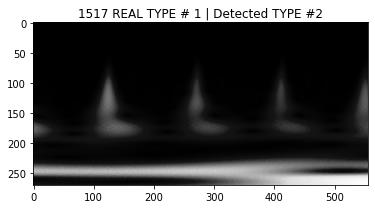

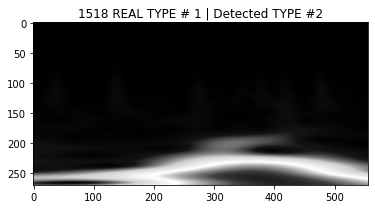

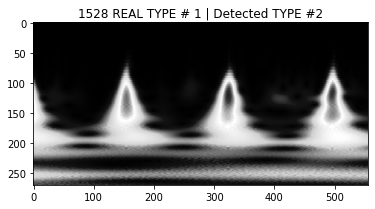

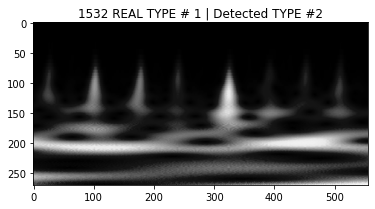

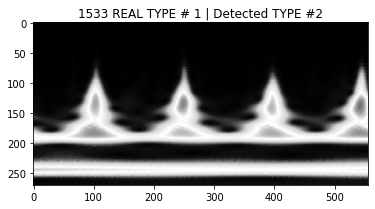

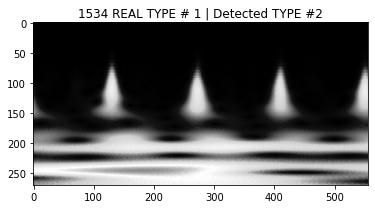

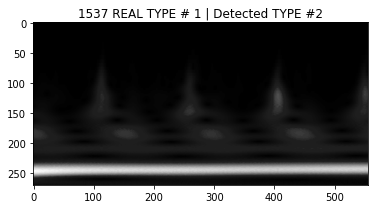

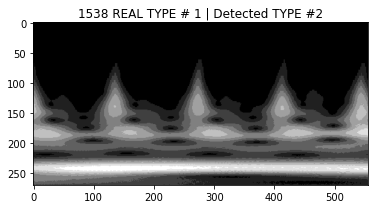

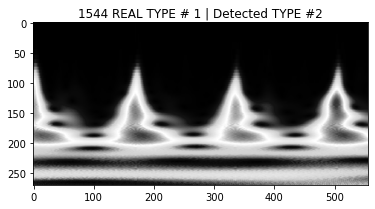

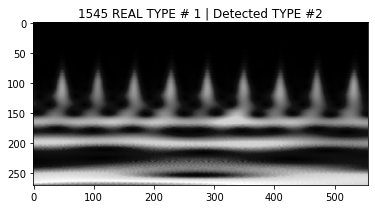

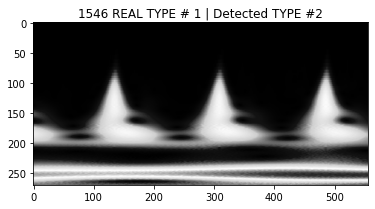

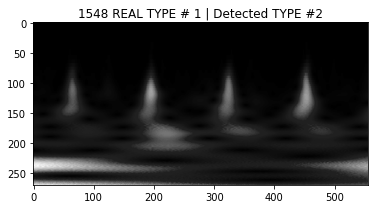

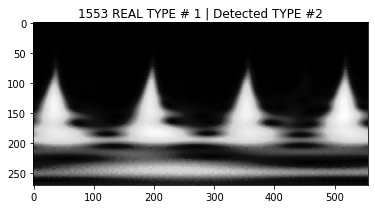

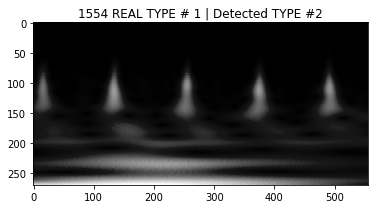

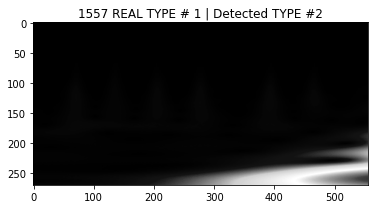

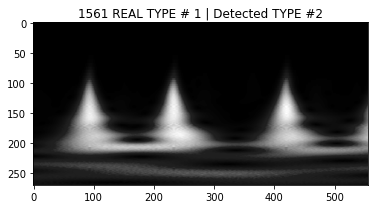

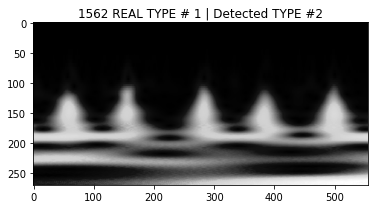

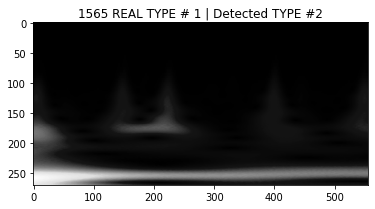

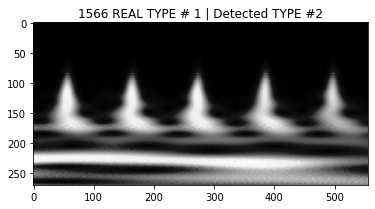

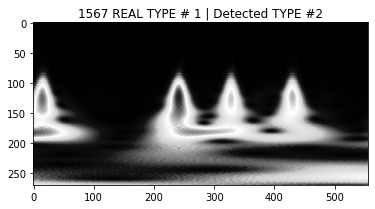

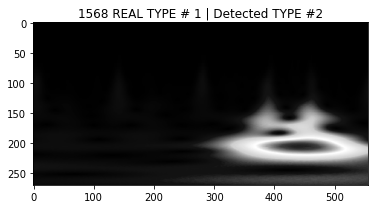

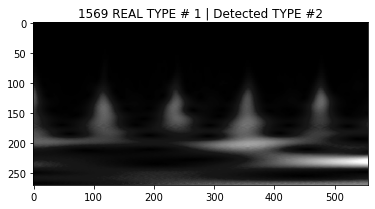

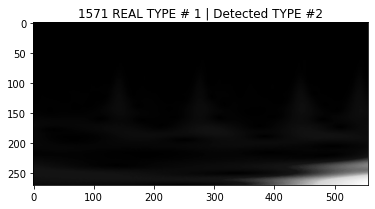

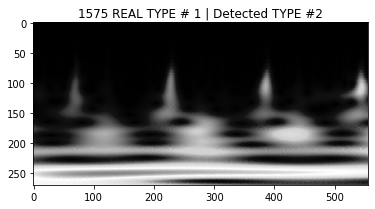

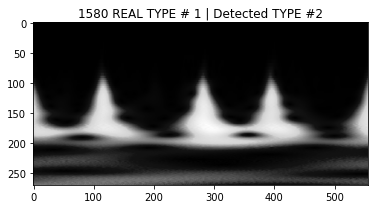

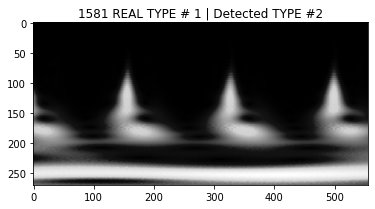

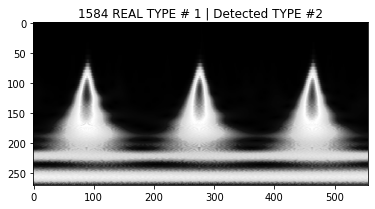

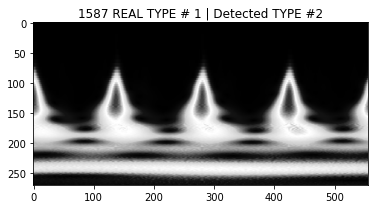

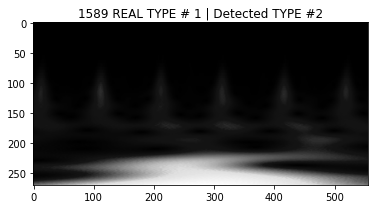

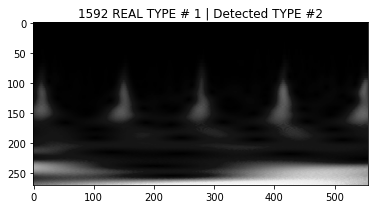

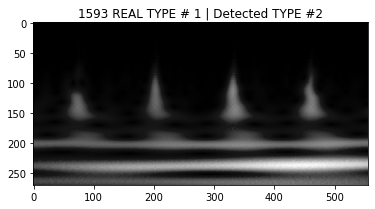

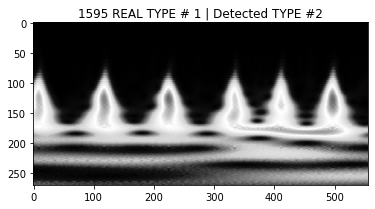

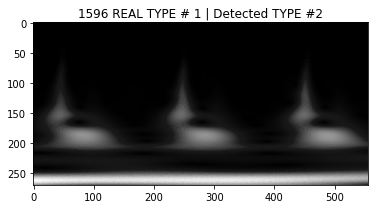

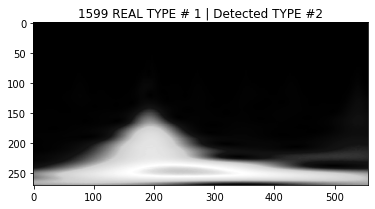

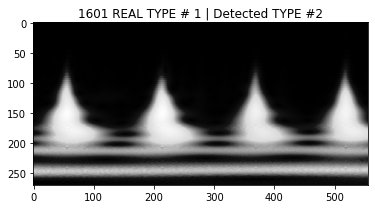

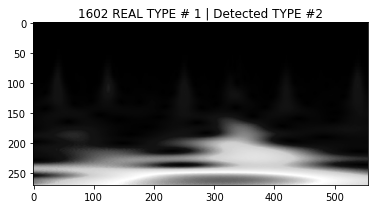

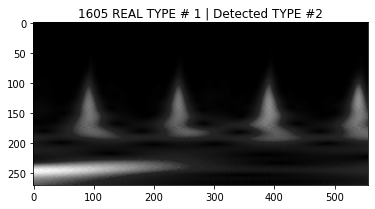

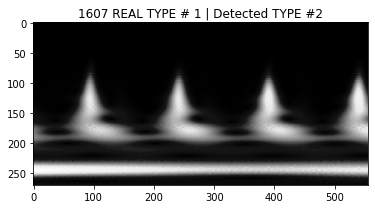

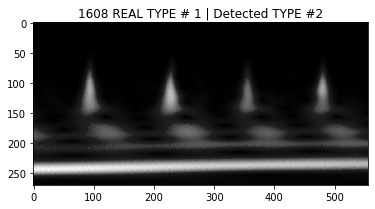

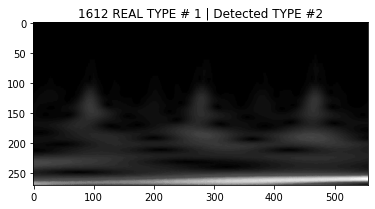

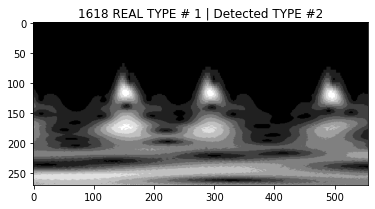

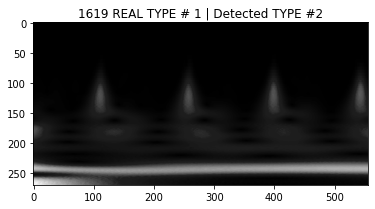

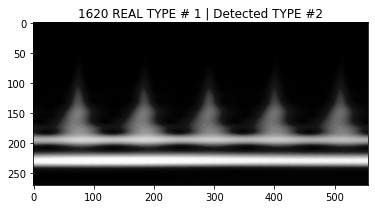

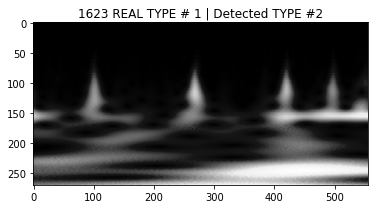

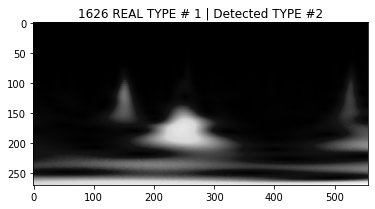

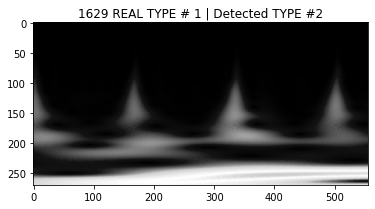

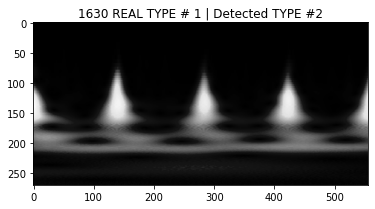

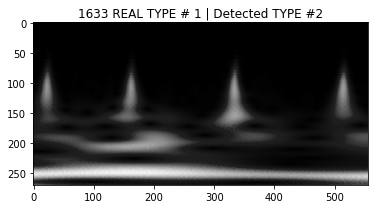

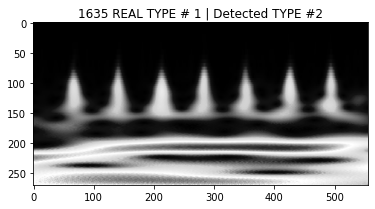

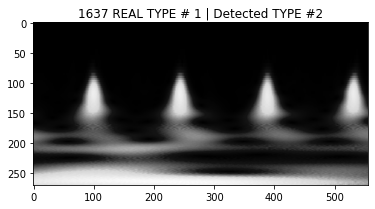

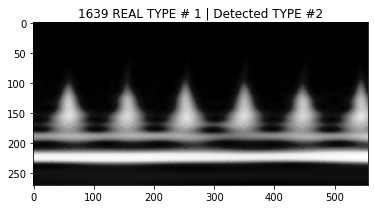

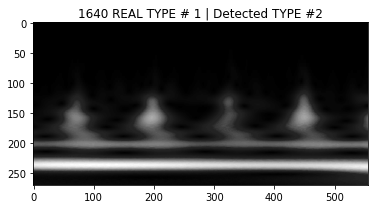

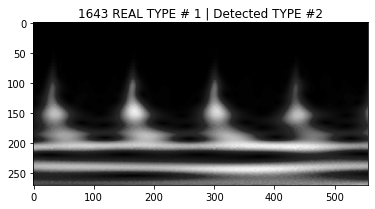

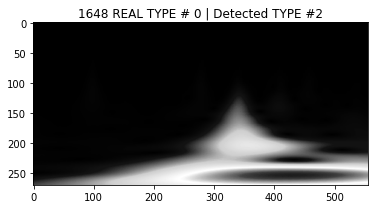

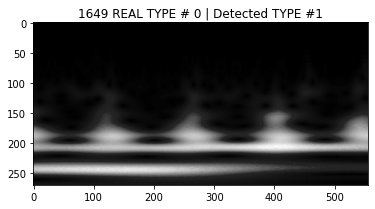

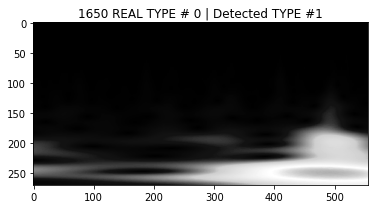

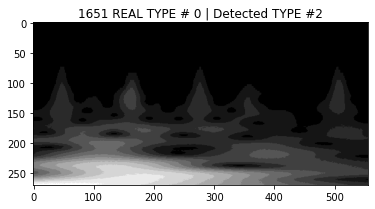

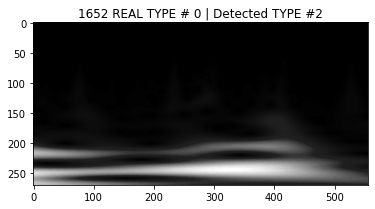

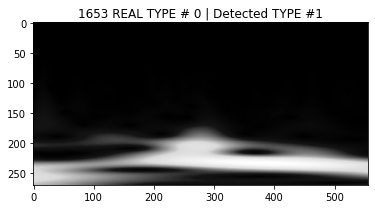

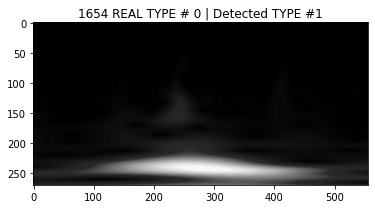

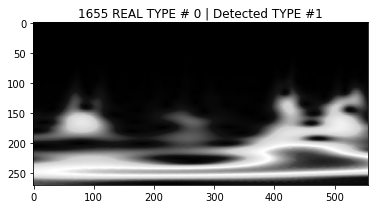

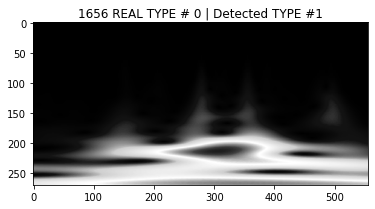

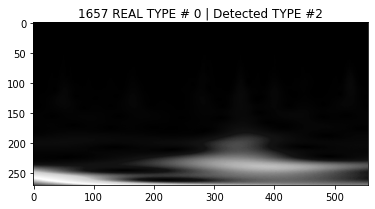

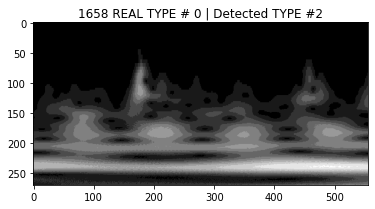

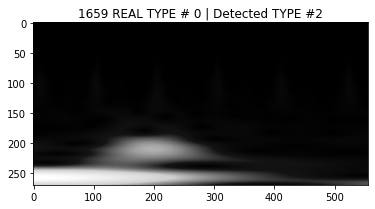

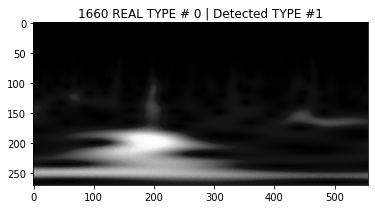

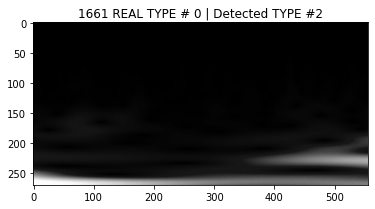

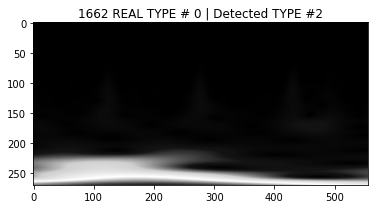

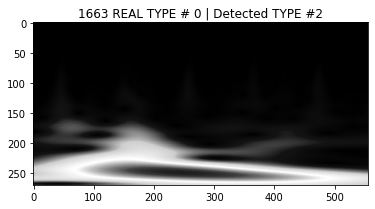

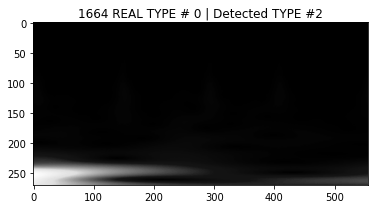

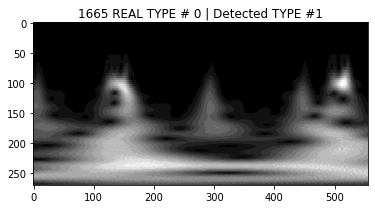

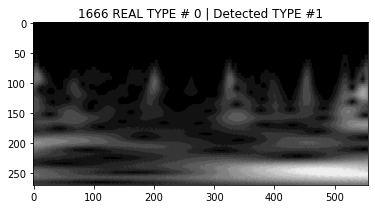

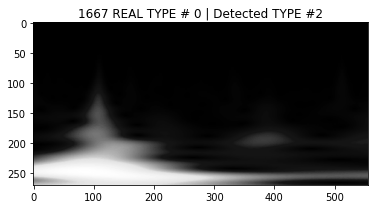

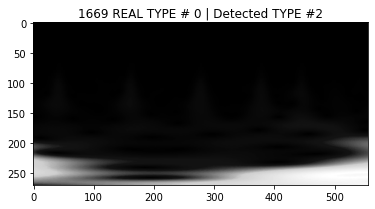

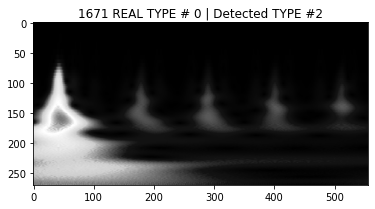

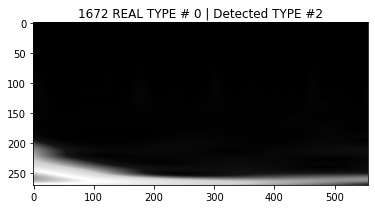

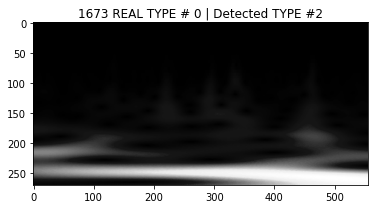

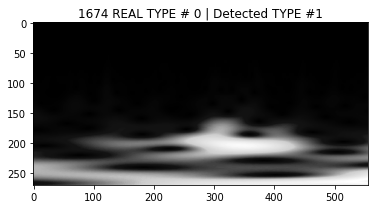

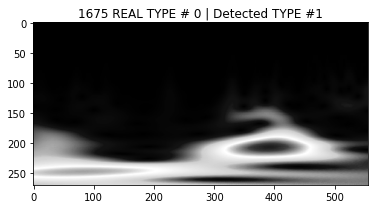

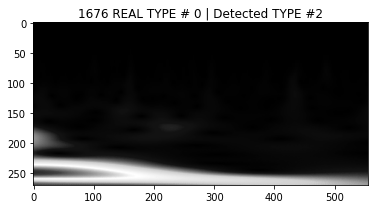

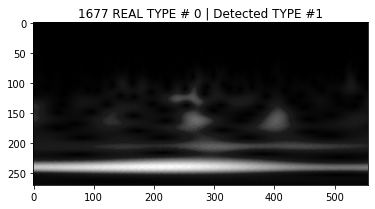

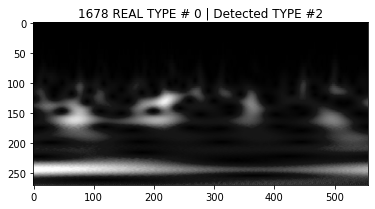

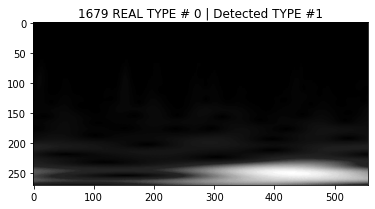

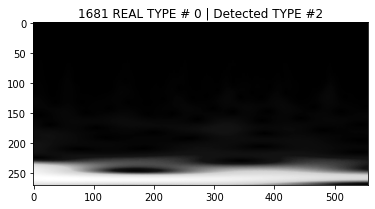

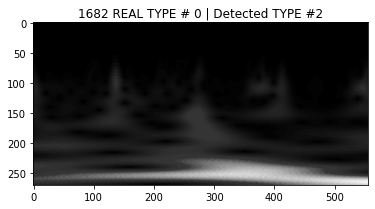

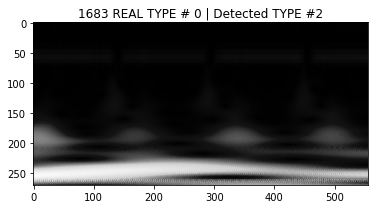

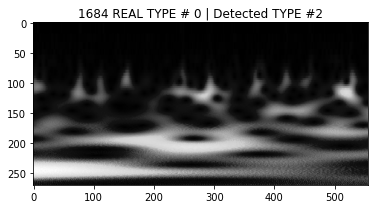

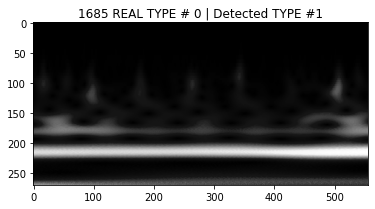

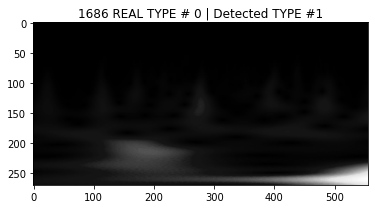

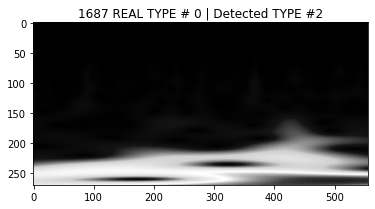

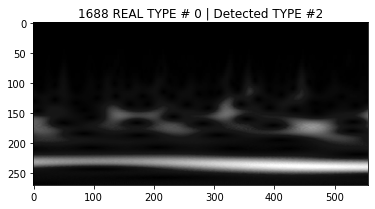

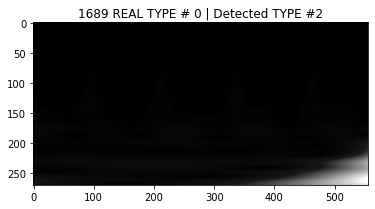

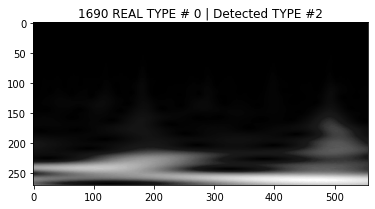

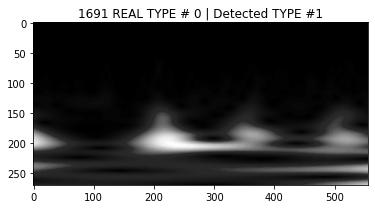

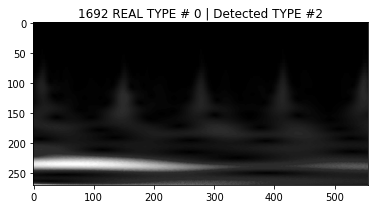

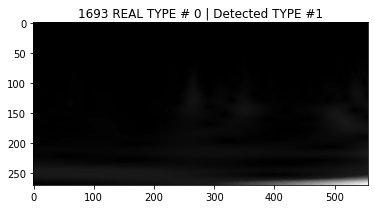

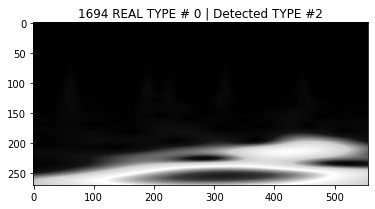

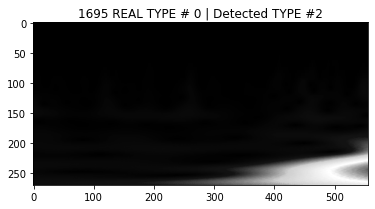

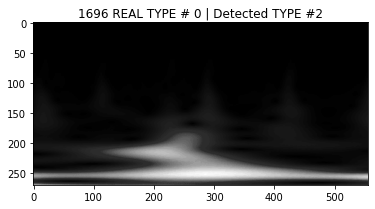

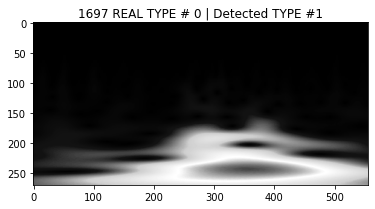

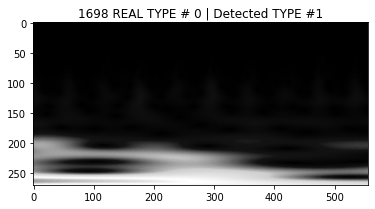

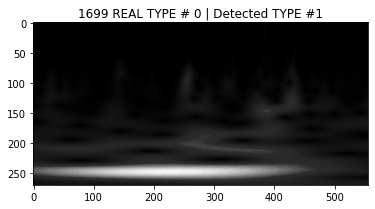

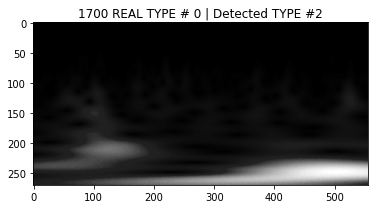

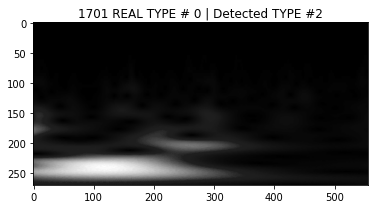

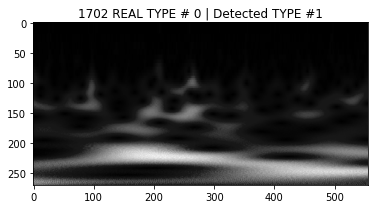

In [5]:
for i in range(0,1703):
    
    sample = x_test2[i]
    sample = sample.reshape((1,270,556,1))
    

    output = new_model.predict(sample)
    #print(output)
    
    if(y_test[i]==np.argmax(output)):
        Stat[y_test[i]]+=1
        
    if(y_test[i]!=np.argmax(output) and i>1505):
        plt.figure()
        plt.imshow(x_test[i],cmap='gray')
        plt.title(str(i)+" REAL TYPE # "+str(y_test[i]) +" | Detected TYPE #" +str(np.argmax(output)))

In [6]:
1703 - sum(Stat)

559

In [7]:
sum(Stat)/1703*100

67.17557251908397

In [8]:
t_N = len(y_test[y_test==2])
t_A = len(y_test[y_test==1])
t_O = len(y_test[y_test==0])

In [9]:
t_N,Stat[2],Stat[2]/t_N*100

(1014, 765, 75.44378698224851)

In [10]:
t_A,Stat[1],Stat[1]/t_A*100

(634, 376, 59.305993690851736)

In [11]:
t_O,Stat[0],Stat[0]/t_O*100

(55, 3, 5.454545454545454)

In [12]:
import core_modules

In [13]:
n, train_names, test_names = core_modules.log(0.8)

8512 Images loaded across 3 Categories


In [14]:
test_names[1702]

'A08493_~.png'